In [7]:
# SB柳田の通算成績を可視化
# 利用パッケージ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# データ取得
url = 'https://npb.jp/bis/players/31835133.html'
df = pd.read_html(url)

# テーブル数を確認
print(len(df))

2


In [37]:
print(df[0])

       0            1
0  ポジション          外野手
1     投打         右投左打
2  身長／体重   188cm／93kg
3   生年月日   1988年10月9日
4     経歴  広島商 - 広島経済大
5   ドラフト  2010年ドラフト2位


In [38]:
print(df[1])

        年度      所属球団    試合    打席    打数   得点    安打  二塁打  三塁打  本塁打  ...  盗塁刺  \
0   2011.0  福岡ソフトバンク     6     5     5    1     0    0    0    0  ...    0   
1   2012.0  福岡ソフトバンク    68   212   195   17    48   10    1    5  ...    1   
2   2013.0  福岡ソフトバンク   104   337   298   48    88   19    2   11  ...    1   
3   2014.0  福岡ソフトバンク   144   615   524   91   166   18    4   15  ...    6   
4   2015.0  福岡ソフトバンク   138   605   502  110   182   31    1   34  ...    8   
5   2016.0  福岡ソフトバンク   120   536   428   82   131   31    4   18  ...    2   
6   2017.0  福岡ソフトバンク   130   551   448   95   139   30    1   31  ...    7   
7   2018.0  福岡ソフトバンク   130   550   475   95   167   29    5   36  ...    7   
8   2019.0  福岡ソフトバンク    38   157   128   17    37    6    1    7  ...    1   
9   2020.0  福岡ソフトバンク   119   515   427   90   146   23    5   29  ...    2   
10  2021.0  福岡ソフトバンク   141   593   516   95   155   36    2   28  ...    0   
11  2022.0  福岡ソフトバンク   117   491   437   63   120   18    1   24

In [52]:
# 出塁率と長打率を引き出す

data = df[1]
data = data.loc[:, ['年度', '出塁率', '長打率']]

data

,年度,出塁率,長打率
0,2011.0,0.000,0.000
1,2012.0,0.300,0.385
2,2013.0,0.377,0.483
3,2014.0,0.413,0.452
4,2015.0,0.469,0.631
5,2016.0,0.446,0.523
6,2017.0,0.426,0.589
7,2018.0,0.431,0.661
8,2019.0,0.420,0.516
9,2020.0,0.449,0.623


In [45]:
# 足してOPS列を作成

data.loc[:, 'ops'] = data['出塁率'] + data['長打率']
data

,年度,出塁率,長打率,ops
0,2011.0,0.000,0.000,0.000
1,2012.0,0.300,0.385,0.685
2,2013.0,0.377,0.483,0.860
3,2014.0,0.413,0.452,0.865
4,2015.0,0.469,0.631,1.100
5,2016.0,0.446,0.523,0.969
6,2017.0,0.426,0.589,1.015
7,2018.0,0.431,0.661,1.092
8,2019.0,0.420,0.516,0.936
9,2020.0,0.449,0.623,1.072


In [ ]:
# 1行目（全部ゼロ）と最終行（通算）を削除
data = data.drop([0,14])

In [48]:
data

,年度,出塁率,長打率,ops
1,2012.0,0.300,0.385,0.685
2,2013.0,0.377,0.483,0.860
3,2014.0,0.413,0.452,0.865
4,2015.0,0.469,0.631,1.100
5,2016.0,0.446,0.523,0.969
6,2017.0,0.426,0.589,1.015
7,2018.0,0.431,0.661,1.092
8,2019.0,0.420,0.516,0.936
9,2020.0,0.449,0.623,1.072
10,2021.0,0.388,0.541,0.929


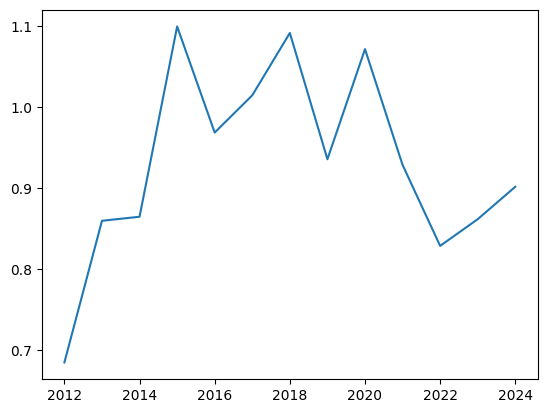

In [51]:
plt.plot(data['年度'], data['ops'])